# Bonus
Following is the pytorch implementation of the of the given network architecture.
 
 #### Note
 With the given architecture, the model could not be converged.

In [1]:
import torch
import pandas as pd
import torch.nn as nn
import torch.nn.functional as F
import seaborn as  sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Age,Price
0,1,0,3,22.0,7.2500
1,2,1,1,38.0,71.2833
2,3,1,3,26.0,7.9250
3,4,1,1,35.0,26.5500
4,5,0,3,35.0,8.0500


In [3]:
# Check for null values
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
Price          0
dtype: int64

In [4]:
X = df.drop(["Price", "PassengerId"], axis=1) # independent variable
y = df["Price"]

X.shape, y.shape

((714, 3), (714,))

In [5]:
X = df.drop(["Price", "PassengerId"], axis=1).values # independent variable
y = df["Price"].values

In [6]:
## Data split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=12)

## Creating tensors
X_train = torch.FloatTensor(X_train)
y_train = torch.FloatTensor(y_train)
X_test = torch.FloatTensor(X_test)
y_test = torch.FloatTensor(y_test)

In [7]:
### Creating ANN Model class with PyTorch

class ANN_Model(nn.Module):
    
    ## Define all the network architecture and variables
    def __init__(self, input_features=3, hidden1=4, out_feature=1):
        super().__init__()
        ## First fully connected layer
        self.f_connected1 = nn.Linear(input_features, hidden1)
        ## Output layer
        self.out = nn.Linear(hidden1, out_feature)
    
    def forward(self, x):
        ## aplying activation function
        x = F.relu(self.f_connected1(x))
        x = self.out(x)
        return x

In [8]:
### Instantiate my ANN module
torch.manual_seed(42)
model = ANN_Model()

In [9]:
## Print the network architecture
model.parameters

<bound method Module.parameters of ANN_Model(
  (f_connected1): Linear(in_features=3, out_features=4, bias=True)
  (out): Linear(in_features=4, out_features=1, bias=True)
)>

In [10]:
## Backward propgation
## -- Define the loss function and define the optimizer

loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.05)

In [11]:
epochs = 500
final_losses = []

for i in range(epochs):
    i += 1
    y_pred = model.forward(X_train)
    loss = loss_function(y_pred, y_train)
    final_losses.append(loss)
    
    if i%100 == 0:
        print("Epoch no. {} and the loss is: {} ".format(i, loss.item()))
    
    ## Important step: we need to reduce the loss. So after epoch this line 
    # erases the gradient of all the optimized class
    optimizer.zero_grad()
    loss.backward() ## to backpropogate and findout the derivative
    optimizer.step()

/home/sangeet/anaconda3/lib/python3.8/site-packages/torch/nn/modules/loss.py:446: UserWarning: Using a target size (torch.Size([571])) that is different to the input size (torch.Size([571, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch no. 100 and the loss is: 524.4064331054688 
Epoch no. 200 and the loss is: 521.3063354492188 
Epoch no. 300 and the loss is: 518.1702880859375 
Epoch no. 400 and the loss is: 516.8455810546875 
Epoch no. 500 and the loss is: 516.7448120117188 


Text(0.5, 0, 'Epoch')

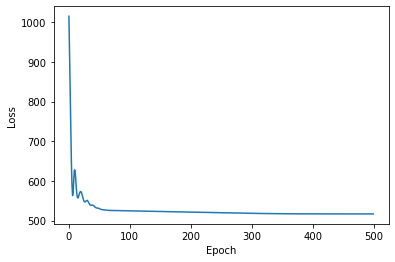

In [12]:
## Plot the loss function
plt.plot(range(epochs), final_losses)
plt.ylabel("Loss")
plt.xlabel("Epoch")

In [15]:
## Pickout the model 
predictions = []
with torch.no_grad():
    for i, data in enumerate(X_test):
        y_pred = model(data)
        predictions.append(y_pred.item())

In [41]:
d = {'Predicted Price':predictions,'Actual Price':y_test.tolist()}
df = pd.DataFrame(d, columns=['Predicted Price','Actual Price'])
df


,Predicted Price,Actual Price
0,19.155849,7.227100
1,19.124681,7.520800
2,19.121262,8.050000
3,19.103291,32.320801
4,19.095121,28.500000
...,...,...
138,19.137880,41.579151
139,19.176374,7.795800
140,19.110132,61.979198
141,19.134037,26.000000
